### Import all the relevant librbaries

In [25]:
import geopandas as gp, pandas as pd
import matplotlib
import descartes
import matplotlib.pyplot as plt
import numpy as np
import csv
from shapely.geometry import Point
import pyproj
import matplotlib.patheffects as PathEffects


### Set parameters for naming convention

In [26]:
k_n = 6             #number of clusters
region = "Bath and North East Somerset"
section = "local"   #this parameter should be left local as in this code we are only plotting local clustering
dim_red_method = "tSNE"
clust_method = "diana"
nclust = "6"

In [27]:
#read the dbf file
shp = gp.read_file('./lsoa_boundary/Lower_Layer_Super_Output_Areas_December_2011_Generalised_Clipped__Boundaries_in_England_and_Wales.dbf')

In [28]:
shp = shp.rename(columns={'lsoa11cd': 'CODE'})
#shp.to_csv('original_SHP_file_data.csv')

#read clustered data for a region specified in the R code
df = pd.read_csv("./{}_CSV_FOR_PLOTTING_CLUST_OUTPUTS/\
{}_{}_{}_clust_df_{}.csv".format(region, dim_red_method, clust_method, nclust, region))

#merge the shape file data with the clustered data, based on the LSOA_CODE
geo = shp.merge(df, on='CODE')

geo["CLUSTER"] = ["Cluster "+str(c) for c in geo["CLUSTER"]]

### Inter-replacement of cluster numbers (to swap the colours on the plot)

In [16]:
#only use this part of the script if colours on the plot need to be swapped around

cl4_list = geo.CLUSTER[geo.CLUSTER == "Cluster 4"].index.tolist()
cl1_list = geo.CLUSTER[geo.CLUSTER == "Cluster 1"].index.tolist()

for x in cl4_list:
    geo.at[x, 'CLUSTER'] = "Cluster 1"
for x in cl1_list:
    geo.at[x, 'CLUSTER'] = "Cluster 4"

cl2_list = geo.CLUSTER[geo.CLUSTER == "Cluster 6"].index.tolist()
cl3_list = geo.CLUSTER[geo.CLUSTER == "Cluster 2"].index.tolist()

for x in cl2_list:
    geo.at[x, 'CLUSTER'] = "Cluster 2"
for x in cl3_list:
    geo.at[x, 'CLUSTER'] = "Cluster 6"
    
cl2_list = geo.CLUSTER[geo.CLUSTER == "Cluster 6"].index.tolist()
cl3_list = geo.CLUSTER[geo.CLUSTER == "Cluster 5"].index.tolist()

for x in cl2_list:
    geo.at[x, 'CLUSTER'] = "Cluster 5"
for x in cl3_list:
    geo.at[x, 'CLUSTER'] = "Cluster 6"

### Convert Lat and Long coordinates of cities to shapefile coordinate system

In [36]:
# in this instance the csv with coordinates for towns, regions and villages in BATHNES is used, 
# but it can equally be used for other geographical regions, provided the csv is set up in the same format

In [29]:
city_coord = pd.read_csv("./input_csv's/Bath_cities_Lat_Long.csv") #read the CSV with lat and long coordinates of Cities
city_coord = city_coord [0:25]   #select the number of cities you have


#convert long and lat coordinates to floats
city_coord.Longitude = city_coord.Longitude.astype(float).fillna(0.0)
city_coord.Latitude = city_coord.Latitude.astype(float).fillna(0.0)

#pyproj coordinate transformation system defined
wgs84=pyproj.Proj("+init=EPSG:4326") # LatLon with WGS84 datum used by GPS units and Google Earth
osgb36=pyproj.Proj("+init=EPSG:27700") # UK Ordnance Survey, 1936 datum

#create two lists with lat and long coordinates
long = list(city_coord['Longitude'])
lat = list(city_coord['Latitude'])

#create an empty dataframe just for point coordinates
point_coord = pd.DataFrame()

#for loop converting the city long and lat coordinates to shapefile type X,Y coordinates
for i in range(0,len(long)):
    point_coord[i] = pyproj.transform(wgs84, osgb36, long[i], lat[i])

#transposing the dataframe with converted coordinate points
point_coord = point_coord.T  

#concatenate coordinate points into one cell and POINT format
point_coord['Coordinates'] = list(zip(point_coord[0], point_coord[1]))
point_coord = point_coord['Coordinates'].apply(Point)

#create a column with transformted coordinates in the city_coord dataframe
city_coord = city_coord.assign(Coordinates = list(point_coord))

#convert the dataframe into a GeoData dataframe
city_coord = gp.GeoDataFrame(city_coord, geometry="Coordinates")

## Convert Lat and Long coordinates of Bath regions to shapefile coordinate system

In [30]:
region_coord = pd.read_csv("./input_csv's/Bath_parishes_Lat_Long.csv") #read the CSV with lat and long coordinates of Cities
region_coord = region_coord [0:15]   #select the number of cities you have


#convert long and lat coordinates to floats
region_coord.Longitude = region_coord.Longitude.astype(float).fillna(0.0)
region_coord.Latitude = region_coord.Latitude.astype(float).fillna(0.0)

#pyproj coordinate transformation system defined
wgs84=pyproj.Proj("+init=EPSG:4326") # LatLon with WGS84 datum used by GPS units and Google Earth
osgb36=pyproj.Proj("+init=EPSG:27700") # UK Ordnance Survey, 1936 datum

#create two lists with lat and long coordinates
long = list(region_coord['Longitude'])
lat = list(region_coord['Latitude'])

#create an empty dataframe just for point coordinates
point_coord = pd.DataFrame()

#for loop converting the city long and lat coordinates to shapefile type X,Y coordinates
for i in range(0,len(long)):
    point_coord[i] = pyproj.transform(wgs84, osgb36, long[i], lat[i])

#transposing the dataframe with converted coordinate points
point_coord = point_coord.T  

#concatenate coordinate points into one cell and POINT format
point_coord['Coordinates'] = list(zip(point_coord[0], point_coord[1]))
point_coord = point_coord['Coordinates'].apply(Point)
#create a column with transformted coordinates in the city_coord dataframe
region_coord = region_coord.assign(Coordinates = list(point_coord))

#convert the dataframe into a GeoData dataframe
region_coord = gp.GeoDataFrame(region_coord, geometry="Coordinates")

## Convert Lat and Long coordinates of villages to shapefile coordinate system

In [31]:
village_coord = pd.read_csv("./input_csv's/Bath_villages_Lat_Long.csv") #read the CSV with lat and long coordinates of Cities
village_coord = village_coord [0:15]   #select the number of cities you have


#convert long and lat coordinates to floats
village_coord.Longitude = village_coord.Longitude.astype(float).fillna(0.0)
village_coord.Latitude = village_coord.Latitude.astype(float).fillna(0.0)

#pyproj coordinate transformation system defined
wgs84=pyproj.Proj("+init=EPSG:4326") # LatLon with WGS84 datum used by GPS units and Google Earth
osgb36=pyproj.Proj("+init=EPSG:27700") # UK Ordnance Survey, 1936 datum

#create two lists with lat and long coordinates
long = list(village_coord['Longitude'])
lat = list(village_coord['Latitude'])

#create an empty dataframe just for point coordinates
point_coord = pd.DataFrame()

#for loop converting the city long and lat coordinates to shapefile type X,Y coordinates
for i in range(0,len(long)):
    point_coord[i] = pyproj.transform(wgs84, osgb36, long[i], lat[i])

#transposing the dataframe with converted coordinate points
point_coord = point_coord.T  

#concatenate coordinate points into one cell and POINT format
point_coord['Coordinates'] = list(zip(point_coord[0], point_coord[1]))
point_coord = point_coord['Coordinates'].apply(Point)
#create a column with transformted coordinates in the city_coord dataframe
village_coord = village_coord.assign(Coordinates = list(point_coord))

#convert the dataframe into a GeoData dataframe
village_coord = gp.GeoDataFrame(village_coord, geometry="Coordinates")

### Plotting Function

In [37]:
##Create a new directory for Map Outputs

In [38]:
import os
path = "Maps Outputs"
os.mkdir(path)

FileExistsError: [Errno 17] File exists: 'Maps Outputs'

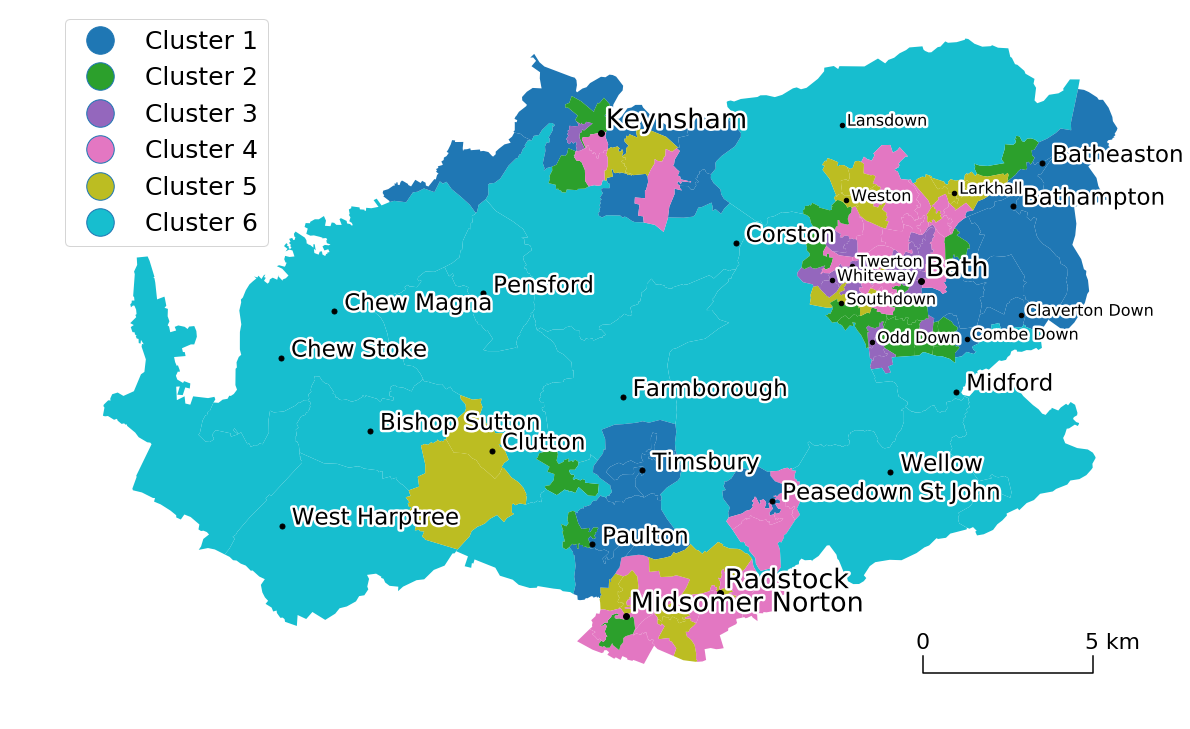

In [40]:
# CONFIGURE FIGURE SETTINGS

legend_font_size = 25

city_point_size = 140
villages_point_size = 100
region_point_size = 80

city_text_size = 27
villages_text_size = 23
region_text_size = 16

markers_size = 2.75


params = {'legend.fontsize': 'large','axes.titlesize':'x-large',
          'legend.fontsize': legend_font_size, 'legend.markerscale': markers_size }
plt.rcParams.update(params)        # update parameters as instructed above
fig,ax1 = plt.subplots(1, figsize=(20, 20))
ax1.set_axis_off()                 # don't show the axes
#plt.axis('equal')



#plot the clusters from the merged datafrmae
geo.plot(ax=ax1, column="CLUSTER", legend=True, cmap="tab10", linewidth=1, alpha=1)


#plot the point markers of towns, regions and villages
city_coord.plot(ax=ax1, marker = '.', markersize = city_point_size, color='black')
village_coord.plot(ax=ax1, marker = '.', markersize = villages_point_size, color='black')
region_coord.plot(ax=ax1, marker = '.', markersize = region_point_size, color='black')

#plot the names of the towns, regions and villages
for x, y, label in zip(city_coord.geometry.x, city_coord.geometry.y, city_coord.Name):
    ax1.annotate(label, size = city_text_size, xy=(x, y), xytext=(5, 5), textcoords="offset points", \
        path_effects=[PathEffects.withStroke(linewidth=5, foreground="w")])

for x, y, label in zip(village_coord.geometry.x, village_coord.geometry.y, village_coord.Name):
    ax1.annotate(label, size = villages_text_size, xy=(x, y), xytext=(10, 1), textcoords="offset points", \
        path_effects=[PathEffects.withStroke(linewidth=5, foreground="w")])     
    
for x, y, label in zip(region_coord.geometry.x, region_coord.geometry.y, region_coord.Name):
    ax1.annotate(label, size = region_text_size, xy=(x, y), xytext=(5, -1), textcoords="offset points", \
        path_effects=[PathEffects.withStroke(linewidth=5, foreground="w")])
    

#plot the legend
dx1, dx2 = 375000, 380000
d_x=[dx1 ,dx1, dx2, dx2]
d_y=[153000, 152500, 152500, 153000]
ax1.plot(d_x,d_y, '-', color = 'k')
ax1.annotate('0', size = (legend_font_size-3), xy = (d_x[0],d_y[0]), xytext=(-8, 8),textcoords="offset points")
ax1.annotate('5 km', size = (legend_font_size-3), xy = (d_x[3],d_y[3]), xytext=(-8, 8),textcoords="offset points")

plt.savefig('./Maps Outputs/{} {} Map_{}_{}_n_{}.pdf'.format(region, section, clust_method, dim_red_method, nclust),bbox_inches='tight', dpi = 300, transparent=True)
